In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix

# Cargar conjuntos de datos
df_train = pd.read_csv("titanic_train.csv")
df_test = pd.read_csv("titanic_test.csv")

In [2]:
# Mostrar las primeras filas del DataFrame para verificar que se haya cargado correctamente
print(df_test.head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [3]:
def preprocess_data(df):
    
    # Sustituir missing values de la edad por el valor medio
    df['Age'].fillna(df['Age'].mean(), inplace=True)

    # Suprimir columnas innecesarias
    columns_to_drop = ['Cabin', 'Ticket', 'Name', 'PassengerId','Embarked']
    df = df.drop(columns=columns_to_drop)

    # Convertir columnas categóricas en variables dummy
    df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

    return df

df_train = preprocess_data(df_train)
df_test = preprocess_data(df_test)

In [4]:
df_train


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,0,3,22.000000,1,0,7.2500,True
1,1,1,38.000000,1,0,71.2833,False
2,1,3,26.000000,0,0,7.9250,False
3,1,1,35.000000,1,0,53.1000,False
4,0,3,35.000000,0,0,8.0500,True
...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,True
887,1,1,19.000000,0,0,30.0000,False
888,0,3,29.699118,1,2,23.4500,False
889,1,1,26.000000,0,0,30.0000,True


In [5]:
df_test

,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,3,34.50000,0,0,7.8292,True
1,3,47.00000,1,0,7.0000,False
2,2,62.00000,0,0,9.6875,True
3,3,27.00000,0,0,8.6625,True
4,3,22.00000,1,1,12.2875,False
...,...,...,...,...,...,...
413,3,30.27259,0,0,8.0500,True
414,1,39.00000,0,0,108.9000,False
415,3,38.50000,0,0,7.2500,True
416,3,30.27259,0,0,8.0500,True


In [6]:
# Creación del modelo de regresión logística
X = df_train.drop('Survived', axis=1)
y = df_train['Survived']

In [14]:

# Crear el modelo Random Forest
random_forest_model = RandomForestClassifier(random_state=42)

# Entrenar el modelo
random_forest_model.fit(X_train, y_train)

# Realizar predicciones
y_pred_rf = random_forest_model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy of Random Forest model:", accuracy_rf)


Accuracy of Random Forest model: 0.8100558659217877


In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Mostrar el informe de clasificación
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Accuracy: 0.8100558659217877

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


Confusion Matrix:
[[92 13]
 [21 53]]


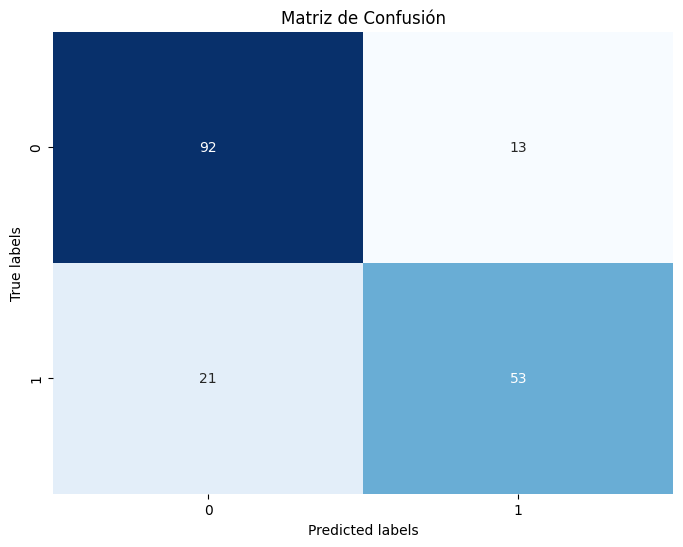

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


crear un modelo de Random Forest y luego visualizar la matriz de confusión, puedes seguir estos pasos:

    Importa las bibliotecas necesarias.
    Divide los datos en conjuntos de entrenamiento y prueba.
    Entrena el modelo de Random Forest.
    Realiza predicciones en el conjunto de prueba.
    Calcula la matriz de confusión.
    Visualiza la matriz de confusión.

Aquí tienes un ejemplo de cómo hacerlo:

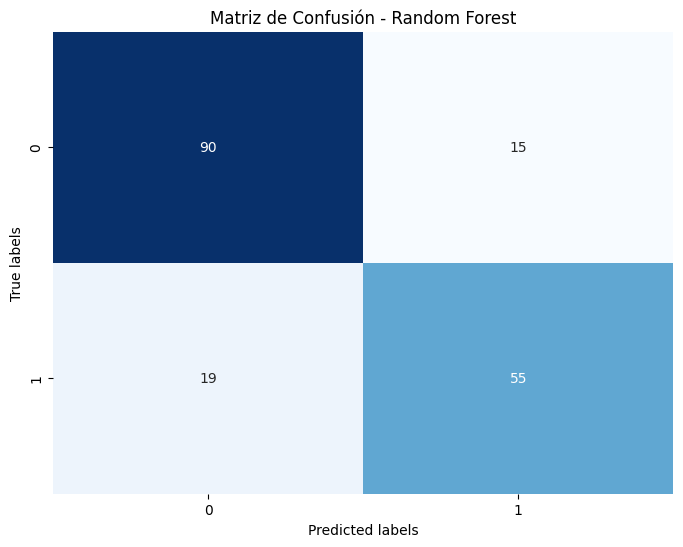

In [12]:
# Paso 3: Entrena el modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Paso 4: Realiza predicciones en el conjunto de prueba
y_pred_rf = rf_model.predict(X_test)

# Paso 5: Calcula la matriz de confusión
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Paso 6: Visualiza la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Matriz de Confusión - Random Forest')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


In [13]:
import matplotlib.pyplot as plt

# Obtener la importancia de las características
importances = rf_model.feature_importances_

# Obtener el nombre de las características
feature_names = X_train.columns

# Ordenar las características por importancia descendente
indices = np.argsort(importances)[::-1]

# Crear un gráfico de barras para mostrar la importancia de las características
plt.figure(figsize=(10, 6))
plt.title("Importancia de las características - Random Forest")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Características")
plt.ylabel("Importancia")
plt.show()


NameError: name 'np' is not defined

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Suponiendo que tienes tus datos de características (X) y la variable objetivo (y)
# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea una instancia del clasificador de Random Forest
random_forest = RandomForestClassifier()

# Entrena el modelo en el conjunto de entrenamiento
random_forest.fit(X_train, y_train)

# Calcula el puntaje en el conjunto de prueba
score = random_forest.score(X_test, y_test)

print("El puntaje del modelo de Random Forest es:", score)


El puntaje del modelo de Random Forest es: 0.7988826815642458


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_forest = RandomForestClassifier()

# Entrena el modelo en el conjunto de entrenamiento
random_forest.fit(X_train, y_train)

# Calcula el puntaje en el conjunto de entrenamiento y prueba
train_score = random_forest.score(X_train, y_train)
test_score = random_forest.score(X_test, y_test)
print("El puntaje del modelo de Random Forest para el conjunto de entrenamiento es:", train_score)
print("El puntaje del modelo de Random Forest para el conjunto de prueba es:", test_score)



El puntaje del modelo de Random Forest para el conjunto de entrenamiento es: 0.9803370786516854
El puntaje del modelo de Random Forest para el conjunto de prueba es: 0.7988826815642458
